In [ ]:
# Load packages
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(tidyverse)
library(Nebulosa)
library(ggpubr)
library(RColorBrewer)
library(MetBrewer)
library(scales)

In [ ]:
##Read in data
seurat <- readRDS('seurat.rds')


In [3]:
DefaultAssay(seurat) <- 'RNA'
seurat

An object of class Seurat 
41678 features across 3167 samples within 4 assays 
Active assay: RNA (36601 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: gRNA, AUC, PRTB
 5 dimensional reductions calculated: umap, pca, tsne, prtbpca, prtbumap

In [6]:
density_col <- rev(colorRampPalette(c('azure1', "#edf8b1", "#1d91c0", "#225ea8", "#0c2c84"))(100))

In [25]:
DefaultAssay(seurat) <- 'AUC'

In [26]:
regulons <- c('LHX9(+)','TLX2(+)','SMAD9(+)','MSX1(+)','ZBTB20(+)')

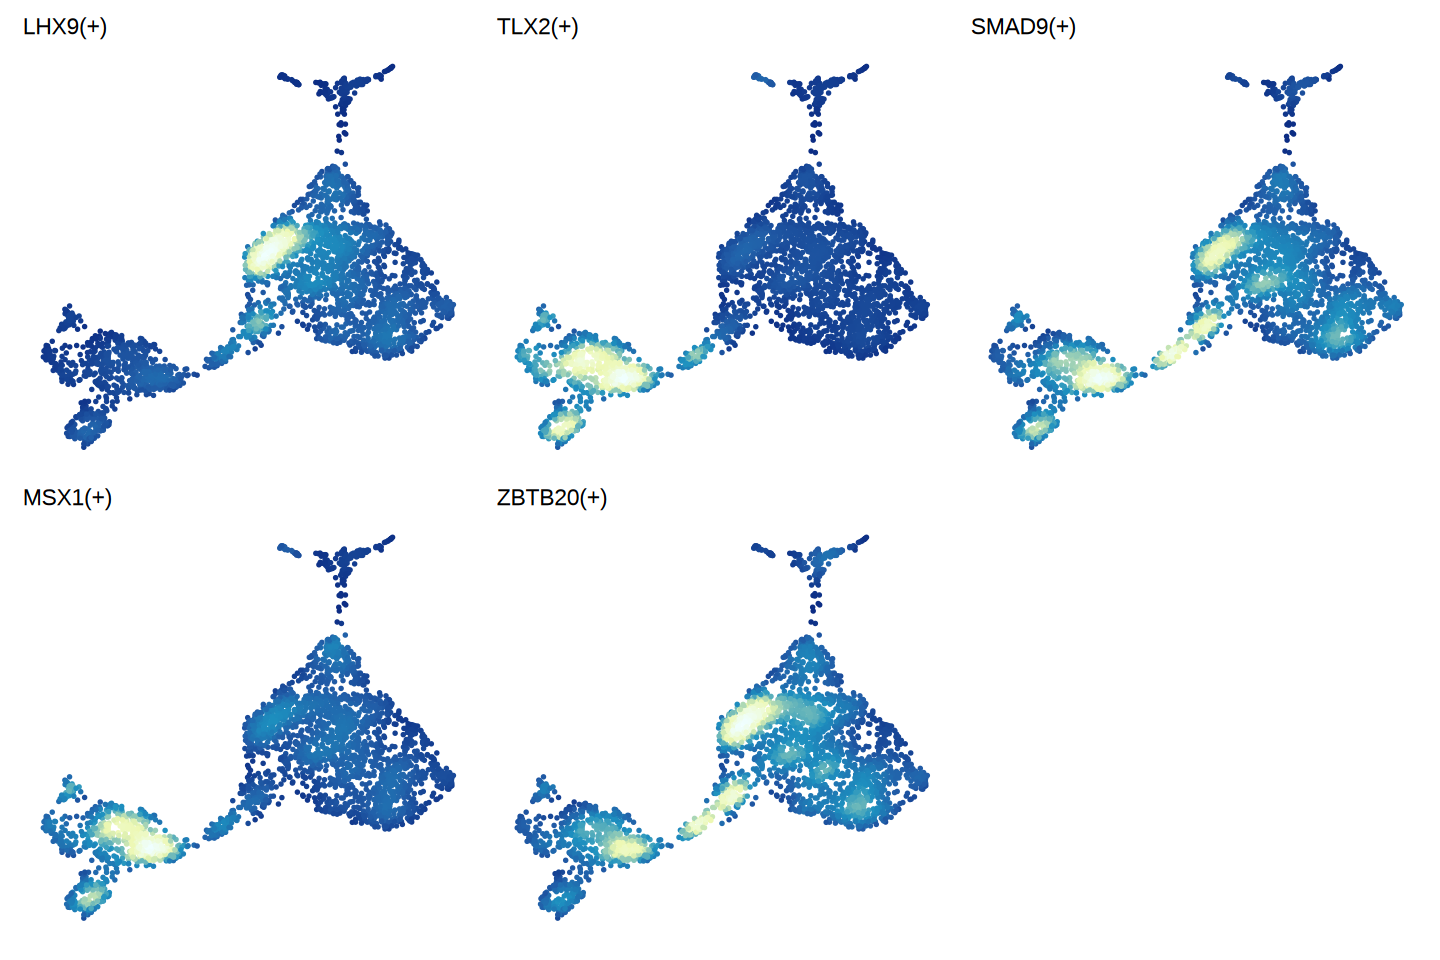

In [ ]:
# Reverse the color palette
custom_palette <- density_col

# Function to plot density for a given regulon using the customized ggplot
plot_density_for_regulon <- function(seurat_obj, regulon) {
  p <- plot_density(seurat_obj, regulon, reduction = 'umap')$data
  
  # Create the ggplot
  ggplot(p, aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(color = feature), size = 0.5) +
    scale_color_gradientn(colors = custom_palette) +
    labs(x = NULL, y = NULL) +
    theme_minimal() +
    theme(
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      panel.grid = element_blank(),
      axis.line = element_blank()
    ) +
    guides(color = "none") +
    ggtitle(regulon)  # Add the title for each regulon
}

# Generate density plots for each regulon
density_plots <- lapply(regulons, function(regulon) {
  plot_density_for_regulon(seurat, regulon)
})

# Combine the plots into a 3x2 grid layout
combined_plot <- wrap_plots(density_plots, ncol = 3, nrow = 2)

# Display the combined plot
options(repr.plot.height = 8, repr.plot.width = 12)
print(combined_plot)


In [ ]:
# Set the desired resolution 
res <- 300

# Set the desired width and height in inches
width_inches <- 3
height_inches <- 3

# Calculate the corresponding dimensions in pixels
width_pixels <- width_inches * res
height_pixels <- height_inches * res


In [ ]:

# Function to plot density for a given regulon and save as PNG
plot_density_for_regulon <- function(seurat_obj, regulon, path, width_pixels, height_pixels, res) {
  p <- plot_density(seurat_obj, regulon, reduction = 'umap')$data
  
  # Create the ggplot with your customization
  ggplot_obj <- ggplot(p, aes(x = UMAP_1, y = UMAP_2)) +
    geom_point(aes(color = feature), size = 0.5) +
    scale_color_gradientn(colors = custom_palette) +
    labs(x = NULL, y = NULL) +
    theme_minimal() +
    theme(
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      panel.grid = element_blank(),
      axis.line = element_blank()
    ) +
    guides(color = "none")
  
  # Define the output file name
  output_file <- paste0(path, regulon, ".png")
  
  # Save the plot
  ggsave(filename = output_file, plot = ggplot_obj, width = width_pixels / res, height = height_pixels / res, dpi = res)
}


[[1]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/LHX9(+).png"

[[2]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/TLX2(+).png"

[[3]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/SMAD9(+).png"

[[4]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/MSX1(+).png"

[[5]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/ZBTB20(+).png"

In [ ]:
path <- 'Density_UMAP/'
width_pixels <- 1000  
height_pixels <- 1000 
res <- 300  

# Apply the function to each regulon and save the plots
lapply(regulons, function(regulon) {
  plot_density_for_regulon(seurat, regulon, path, width_pixels, height_pixels, res)
})

In [ ]:
# Now plot the gRNAs
DefaultAssay(seurat) <- 'gRNA'
seurat

An object of class Seurat 
41678 features across 3167 samples within 4 assays 
Active assay: gRNA (12 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, AUC, PRTB
 5 dimensional reductions calculated: umap, pca, tsne, prtbpca, prtbumap

[[1]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/LHX9_vs_Ctrl.png"

[[2]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/TLX2_vs_Ctrl.png"

[[3]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/SMAD9_vs_Ctrl.png"

[[4]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/MSX1_vs_Ctrl.png"

[[5]]
[1] "/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/TF_KO/Density_UMAP/ZBTB20_vs_Ctrl.png"

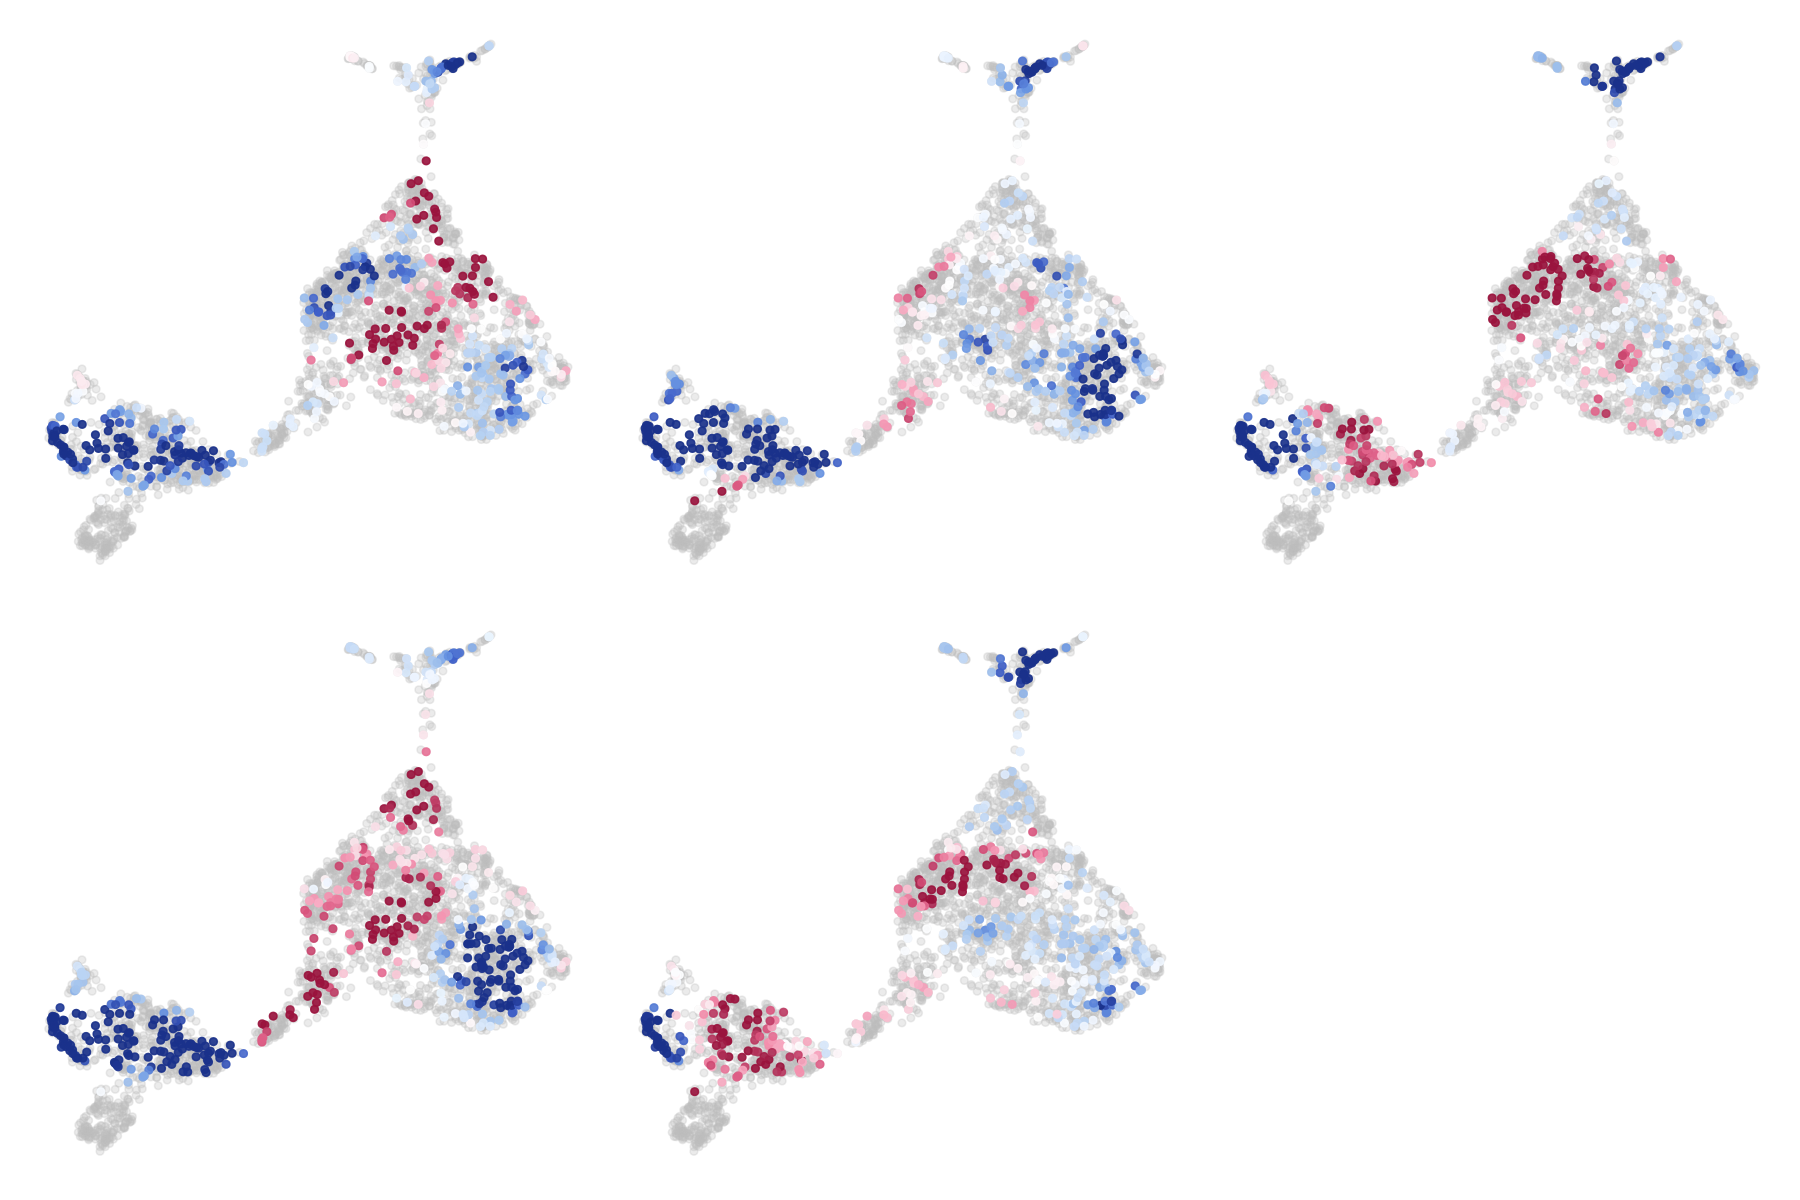

In [ ]:

# Extract UMAP coordinates
umap_data <- Embeddings(seurat, "umap")

# Get all cell names
all_cells <- rownames(umap_data)

# Get unique KO_call groups, excluding 'Ctrl'
ko_groups <- setdiff(unique(seurat$KO_call), 'Ctrl')

# Calculate the density for the control group ('Ctrl')
ctrl_cells <- WhichCells(seurat, expression = KO_call == 'Ctrl')
ctrl_density <- Nebulosa:::calculate_density(w = rep(1, length(ctrl_cells)), 
                                             x = umap_data[ctrl_cells, ], 
                                             method = "wkde")

# Create a data frame for control density with all cells
ctrl_density_df <- data.frame(UMAP_1 = umap_data[ctrl_cells, 1], 
                              UMAP_2 = umap_data[ctrl_cells, 2], 
                              Density = ctrl_density)

# Function to calculate and plot differential density for a single group and save as PNG
plot_diff_density_for_group <- function(group_name, umap_data, seurat_obj, ctrl_density_df, path, width_pixels, height_pixels, res) {
  # Subset cells belonging to the current KO group
  ko_cells <- WhichCells(seurat_obj, expression = KO_call == group_name)
  
  # Calculate densities for the current KO group
  ko_density <- Nebulosa:::calculate_density(w = rep(1, length(ko_cells)), 
                                             x = umap_data[ko_cells, ], 
                                             method = "wkde")
  
  # Create a KO density data frame
  ko_density_df <- data.frame(UMAP_1 = umap_data[ko_cells, 1], 
                              UMAP_2 = umap_data[ko_cells, 2], 
                              Density = ko_density)
  
  # Match KO densities to control cells based on coordinates
  matched_ko_density <- sapply(1:nrow(ctrl_density_df), function(i) {
    # Find the closest KO cell
    dists <- sqrt((ko_density_df$UMAP_1 - ctrl_density_df$UMAP_1[i])^2 + 
                  (ko_density_df$UMAP_2 - ctrl_density_df$UMAP_2[i])^2)
    closest_idx <- which.min(dists)
    return(ko_density_df$Density[closest_idx])
  })
  
  # Calculate the difference in density between Ctrl and matched KO
  ctrl_density_df$Density_Diff <- matched_ko_density - ctrl_density_df$Density
  
  # Create a data frame for all cells (background)
  background_df <- data.frame(UMAP_1 = umap_data[, 1], 
                              UMAP_2 = umap_data[, 2])
  
  # Define the custom color palette from MetBrewer
  custom_palette <- rev(met.brewer("Benedictus", n = 100))
  
  # Plot the differential density for the Ctrl group with background
  p <- ggplot() +
    geom_point(data = background_df, aes(x = UMAP_1, y = UMAP_2), color = "grey", alpha = 0.3) +
    geom_point(data = ctrl_density_df, aes(x = UMAP_1, y = UMAP_2, color = Density_Diff), alpha = 0.9) +
    scale_color_gradientn(colors = custom_palette, oob = scales::squish, limits = c(-8e-05,1e-04)) +
    theme_classic() +
    labs(x = NULL, y = NULL) +
    theme_minimal() +
    theme(
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      panel.grid = element_blank(),
      axis.line = element_blank()
    ) +
    guides(color = "none")
  
  # Define the output file name
  output_file <- paste0(path, group_name, "_vs_Ctrl.png")
  
  # Save the plot
  ggsave(filename = output_file, plot = p, width = width_pixels / res, height = height_pixels / res, dpi = res)
}

# Path to save the plots
path <- 'Density_UMAP/'
width_pixels <- 1000  
height_pixels <- 1000  
res <- 300  

# Generate and store plots for each KO_call group
lapply(ko_groups, function(ko) {
  plot_diff_density_for_group(ko, umap_data, seurat, ctrl_density_df, path, width_pixels, height_pixels, res)
})

# Combine the plots into a grid layout similar to the attached image 
combined_plot <- wrap_plots(diff_density_plots, ncol = 3)

# Display the combined plot 
options(repr.plot.height = 10, repr.plot.width = 15)
print(combined_plot)
